In [822]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.imputation.mice import MICE, MICEData
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
import time
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.neural_network import MLPClassifier
import itertools
#import all the functions we wrote ourselves
%pip install import_ipynb
import import_ipynb
#import Functions as functions

Note: you may need to restart the kernel to use updated packages.


Data Preprocessing with the following steps:
(i) loading and adding important variables
(ii) rough overview
(iii) missing values (remove columns, impute)
(iv) outliers
(v) data types
(vi) standardize
(vii) export cleaned dataset to csv for visual overview

In [752]:
#index_col=0 to make the companies/ the dates the indizes
sp=pd.read_csv("Data/SP500.csv",sep=",",index_col=0)

gdp = pd.read_csv("Data/GDP USA.csv", sep=",", index_col=0)

infl = pd.read_csv("Data/INFL.csv",sep=",", index_col=0)

df14=pd.read_csv("Data/2014_Financial_Data.csv",sep=",",index_col=0)
df15=pd.read_csv("Data/2015_Financial_Data.csv",sep=",",index_col=0)
df16=pd.read_csv("Data/2016_Financial_Data.csv",sep=",",index_col=0)
df17=pd.read_csv("Data/2017_Financial_Data.csv",sep=",",index_col=0)
df18=pd.read_csv("Data/2018_Financial_Data.csv",sep=",",index_col=0)

#first overview
df14.describe(include="all")

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3808,3.808000e+03,3808.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660,NaN,NaN
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,NaN,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,NaN,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,NaN,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,NaN,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,NaN,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,NaN,1.331484e+01,1.000000


In [753]:
#making one column with price var (neater if done here)
#no need for pipeline

df14.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df15.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df16.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df17.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df18.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

In [755]:
# create variables for gdp and inflation per year
gdp14 = gdp.iloc[1][0] * 1000000000
gdp15 = gdp.iloc[2][0] * 1000000000
gdp16 = gdp.iloc[3][0] * 1000000000
gdp17 = gdp.iloc[4][0] * 1000000000
gdp18 = gdp.iloc[5][0] * 1000000000

infl14 = infl.iloc[0][0]
infl15 = infl.iloc[1][0]
infl16 = infl.iloc[2][0]
infl17 = infl.iloc[3][0]
infl18 = infl.iloc[4][0]

In [756]:
#adding the variables to the dataset
all_data=[df14,df15,df16,df17,df18]
all_gdp=[gdp14,gdp15,gdp16,gdp17,gdp18]
all_infl=[infl14,infl15,infl16,infl17,infl18]

for data, gdp in zip(all_data, all_gdp):
    data["GDP"] = gdp

for data, infl in zip(all_data, all_infl):
    data["Inflation"] = infl

In [757]:
#creating year variable

all_data=[df14,df15,df16,df17,df18]

count=0
for data in all_data:
    data["year"]=2014+count
    count+=1
    
#converting to cat. variable

for data in all_data:
        data["year"]=data.year.astype("category")

In [758]:
#creating the values with the perf. of the s&p to compare the companies to
sp14_performance=sp.loc["2014-12-31"].item()
sp15_performance=sp.loc["2015-12-31"].item()
sp16_performance=sp.loc["2016-12-30"].item()
sp17_performance=sp.loc["2017-12-29"].item()
sp18_performance=sp.loc["2018-12-31"].item()
#list with the performances
sp_performances=[sp14_performance,sp15_performance,sp16_performance,sp17_performance,sp18_performance]

In [759]:
#using encoder to make the categorical vars as that will still work when using the pipeline
from sklearn import preprocessing as pp
from sklearn.pipeline import Pipeline, FeatureUnion

all_data=[df14,df15,df16,df17,df18]

le=pp.LabelEncoder()

for data in all_data:
    data["Sector"]=le.fit_transform(data["Sector"])

In [760]:
#for just one column (problem with length)

all_data = [df14, df15, df16, df17, df18]
sp_performances

#preallocation for faster results
for data in all_data:
    data["strategy"]=""
    

for data, value in zip(all_data,sp_performances):
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value)) >= 2.5, ["buy"], data["strategy"])
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value) < 2.5) &
                            (data["PRICE_VAR"].subtract(value) > -2.5), ["hold"], data["strategy"])
        data["strategy"] = np.where((data["PRICE_VAR"].subtract(value)) <= -2.5, ["sell"], data["strategy"])

#making it a categorical variable where 2 is sell, 1 is hold and 0 is buy

le=pp.LabelEncoder()

for data in all_data:
        data["strategy"]=le.fit_transform(data["strategy"])


Missing Values
what should one do with zeros in the dataset? Are they imputed by iterative imputing?

In [761]:
# NANs
#I do the following

total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)

    # Zeros
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)

df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])
   


In [762]:
# Find reasonable threshold for nan-values situation

test_nan_level = 0.7
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.8
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      2997.000000
Percent NaN      14.240236
Name: 0.7, dtype: float64
Total Zeros      4843.60000
Percent Zeros      23.01435
Name: 0.8, dtype: float64


In [763]:
# Clean dataset applying thresholds for both zero values, nan-values
#we have to do this for the entire dataframe df as all the years need the same columns
#do you really want to drop columns with 16% NANs?
df=pd.concat([df14,df15,df16,df17,df18])

print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

#df = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
#print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_dropnan.shape[1]}')

#df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)

#df = df_dropnan.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
#print(f'NUMBER OF VARIABLES AFTER Zeros and NAN THRESHOLDs {thresh_zeros:.2f}%: {df.shape[1]}')

#which columns did we drop?
bad_columns=df_nans[df_nans['Percent NaN'] > thresh_nan]

#dfbad=df.columns[bad_columns]

#maybe settle for dropping columns with percent NaN>30%

bad_col=df.isnull().sum()>0.3*len(df)

#dropping those 20 columns for all datasets seperately

all_data=[df14,df15,df16,df17,df18]

for data in all_data:
    NA=data.columns[bad_col]
    data.drop(NA,axis=1,inplace=True)
    
print(f'New NUMBER OF VARIABLES: {df14.shape[1]}')
print()

INITIAL NUMBER OF VARIABLES: 228

New NUMBER OF VARIABLES: 208



we connot just drop zeros (drops strategy aswell etc) 

C:\Users\eminu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


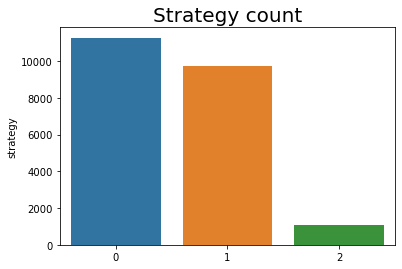

In [740]:
#going on a journey to search for outliers/check balancedness of the dataset
import seaborn as sns

strat=df["strategy"].value_counts()

# Plot class distribution

sns.barplot(np.arange(len(strat)), strat)
plt.title('Strategy count', fontsize=20)
plt.show()

#pretty imbalanced

Outliers: there are outliers



In [810]:
#searching for outliers
#start with z values (centered and stanardized distance) which gives very ugly results


z=np.abs(stats.zscore(df14.select_dtypes(include="float64")))

theshold=3

print(np.where(z>3))

(array([  81,  121,  153,  426,  471,  472,  529,  544,  579,  595,  601,
        604,  616,  617,  651,  674,  688,  701,  741,  857,  860,  862,
        884, 1062, 1186, 1265, 1326, 1464, 1529, 1795, 1886, 2153, 2379,
       2903, 3161, 3236, 3472, 3485, 3574, 3595, 3707, 3715], dtype=int64), array([201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201,
       201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201,
       201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201,
       201, 201, 201], dtype=int64))


In [786]:
#outliers (saw that in the description)
#no problem if we do not have the same observations; so i`ll do it yearwise

# Get stocks that increased more than 200%

all_data=[df14,df15,df16,df17,df18]

gain = 200

for data in all_data:

    top_gainers = data[data["PRICE_VAR"] >= gain]
    top_gainers = top_gainers["PRICE_VAR"].sort_values(ascending=False)
    print(f"{len(top_gainers)} STOCKS with more than {gain}% gain.")
    data = data.drop(top_gainers.index,inplace=True)

#we have 231 stocks with more than 200% gain

#we do not want these stocks as we think that they are "faked" (or typos etc.)

0 STOCKS with more than 200% gain.
0 STOCKS with more than 200% gain.
0 STOCKS with more than 200% gain.
0 STOCKS with more than 200% gain.
0 STOCKS with more than 200% gain.


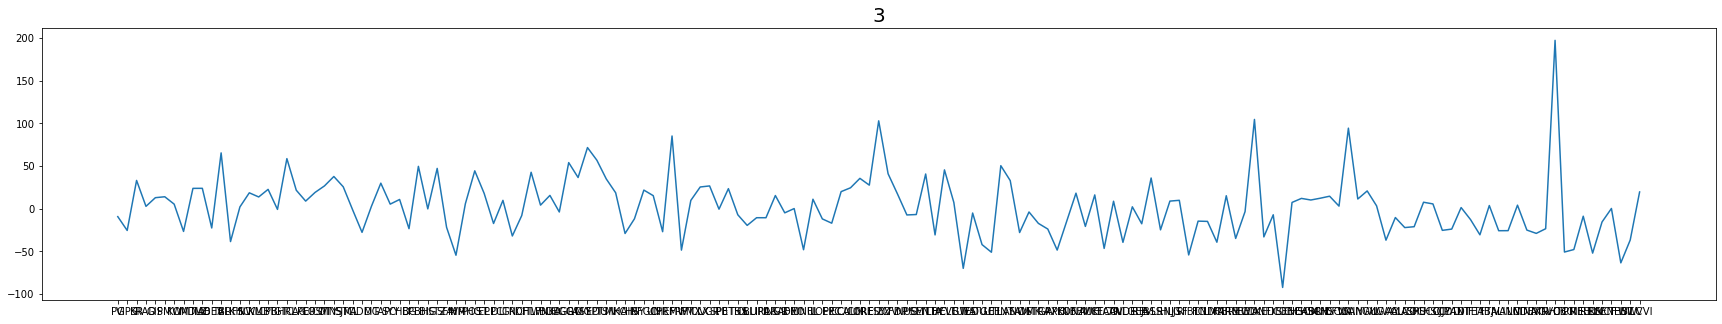

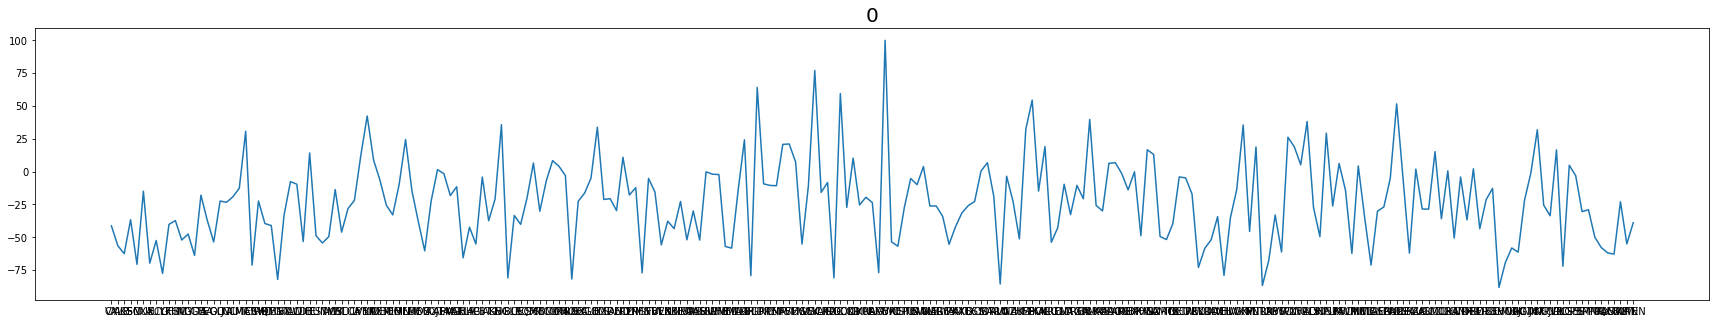

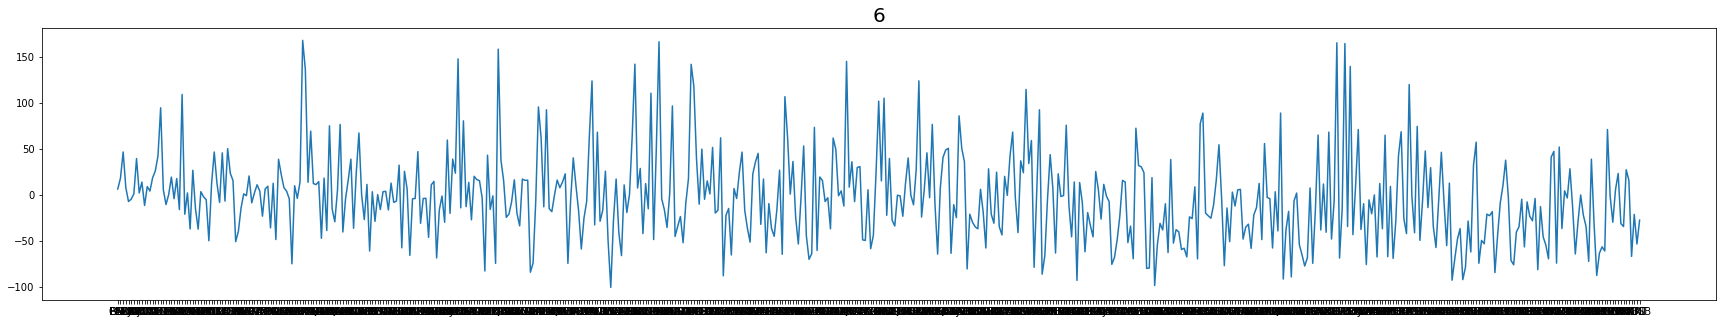

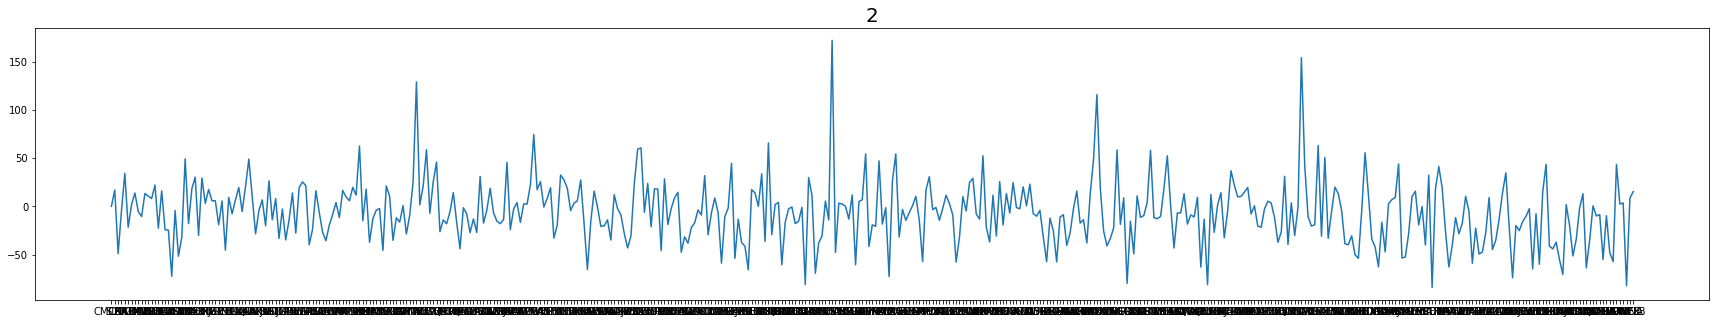

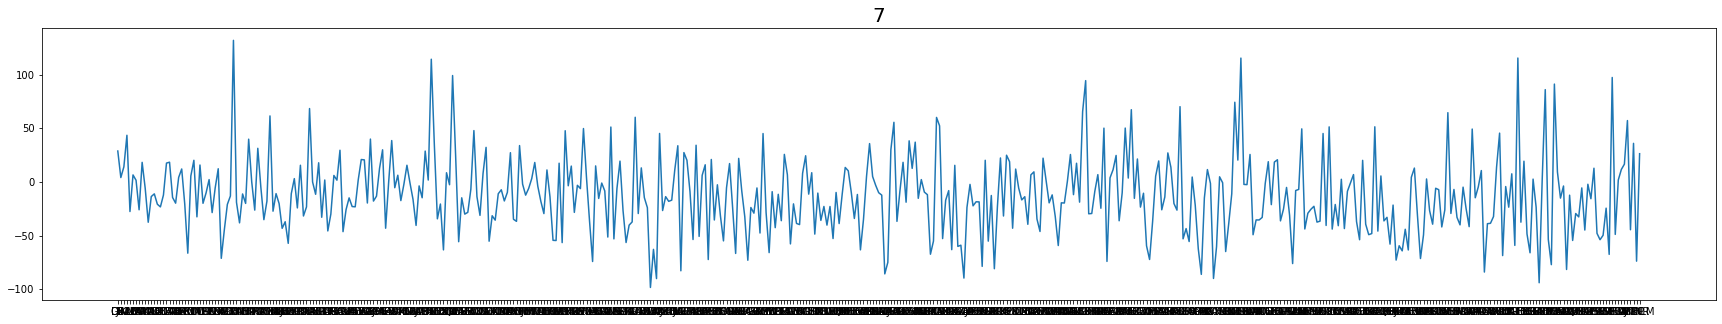

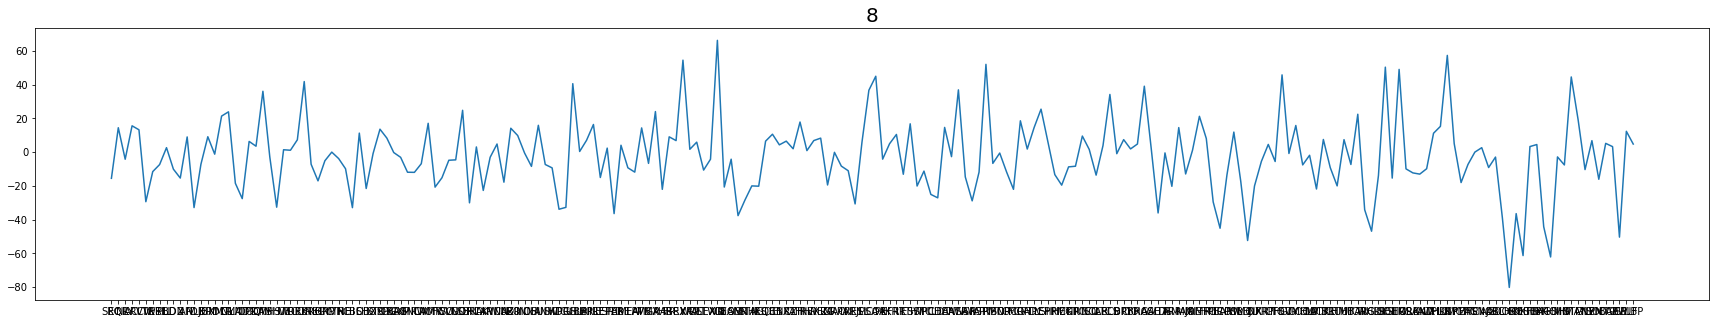

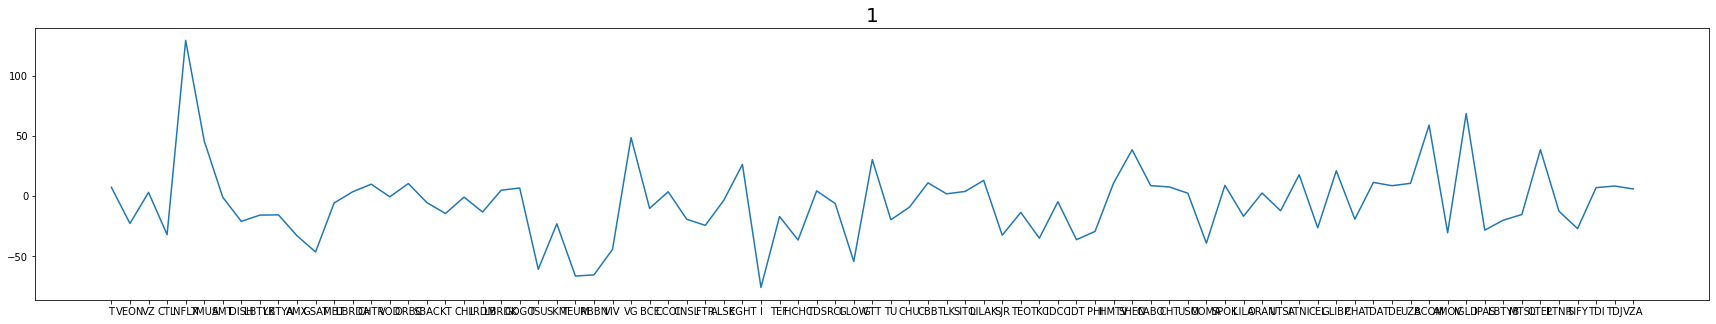

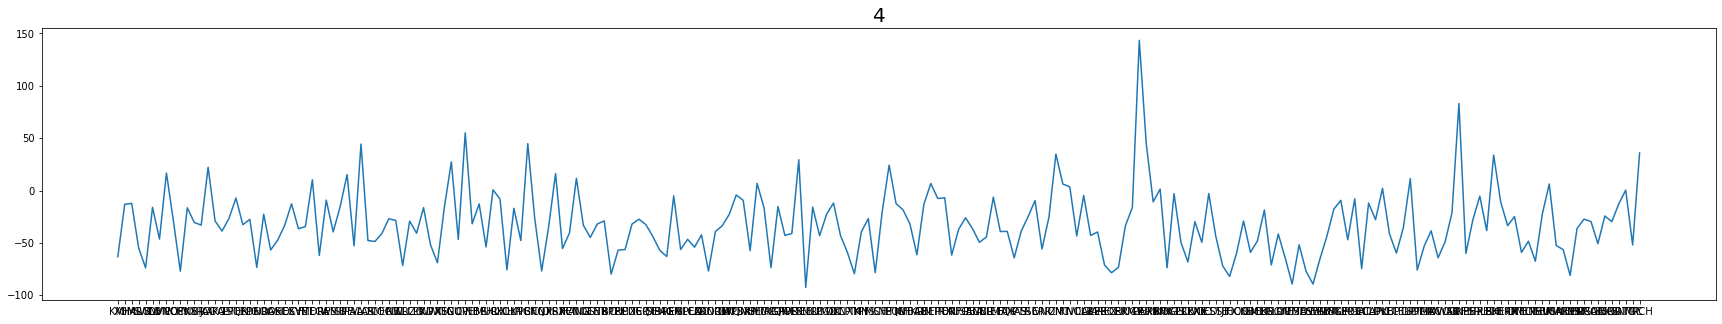

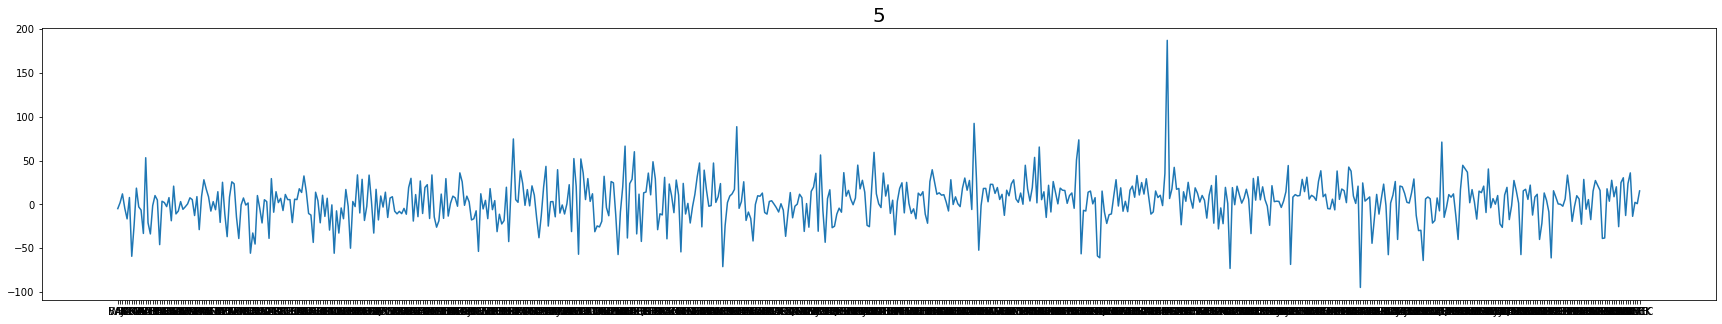

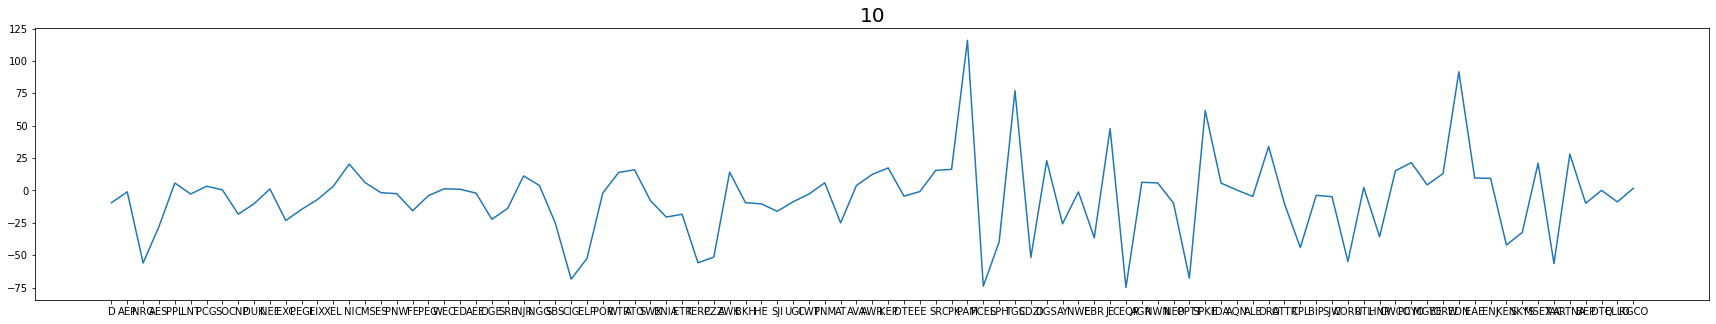

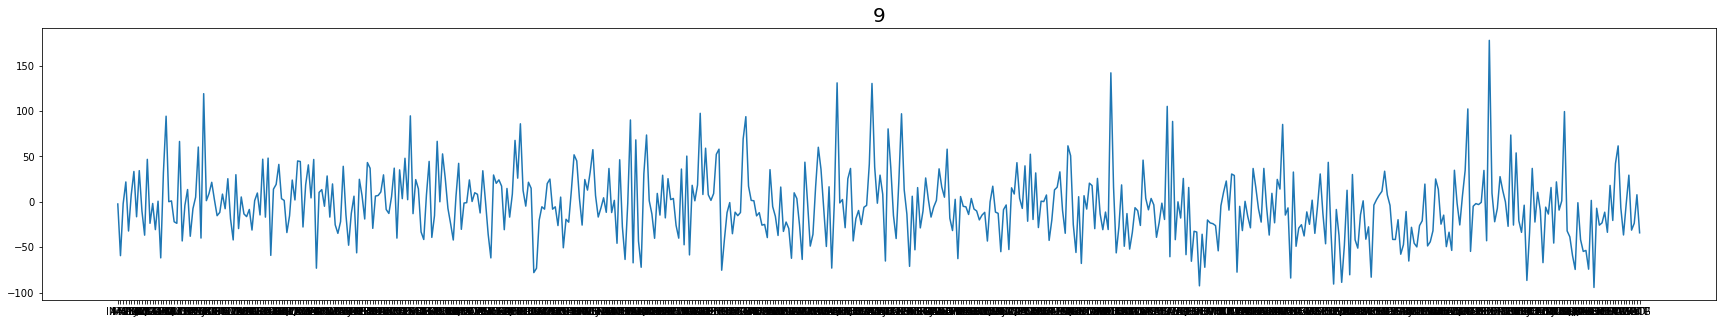

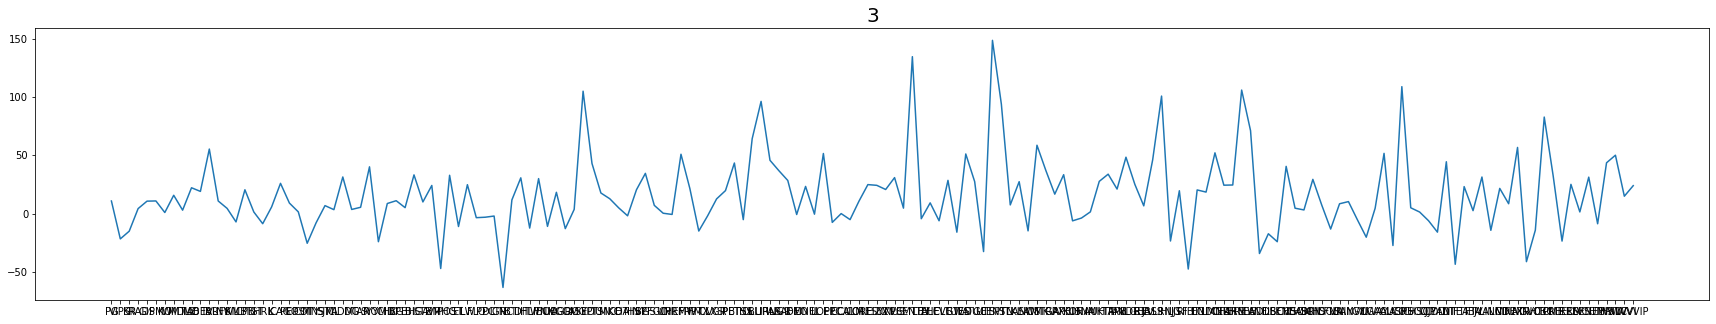

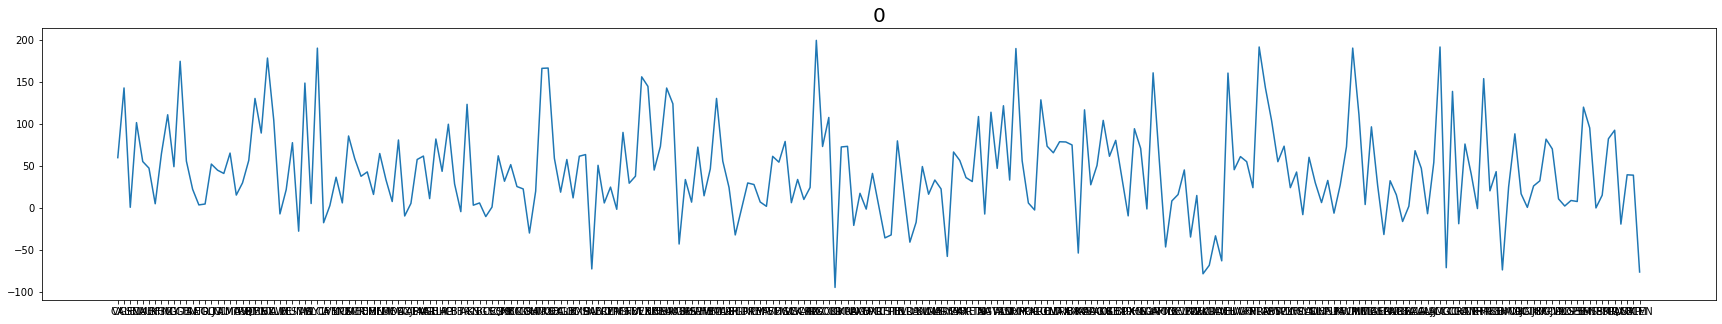

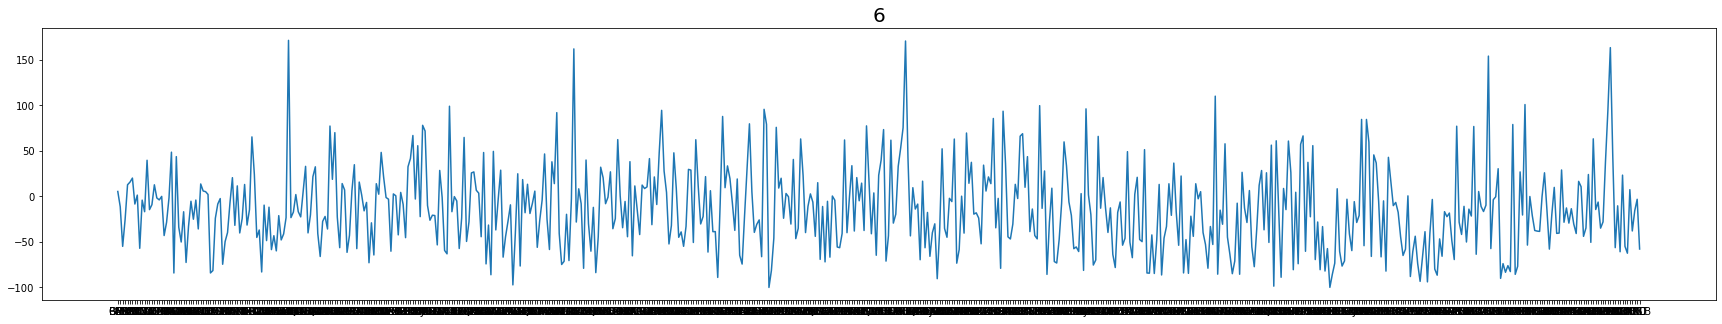

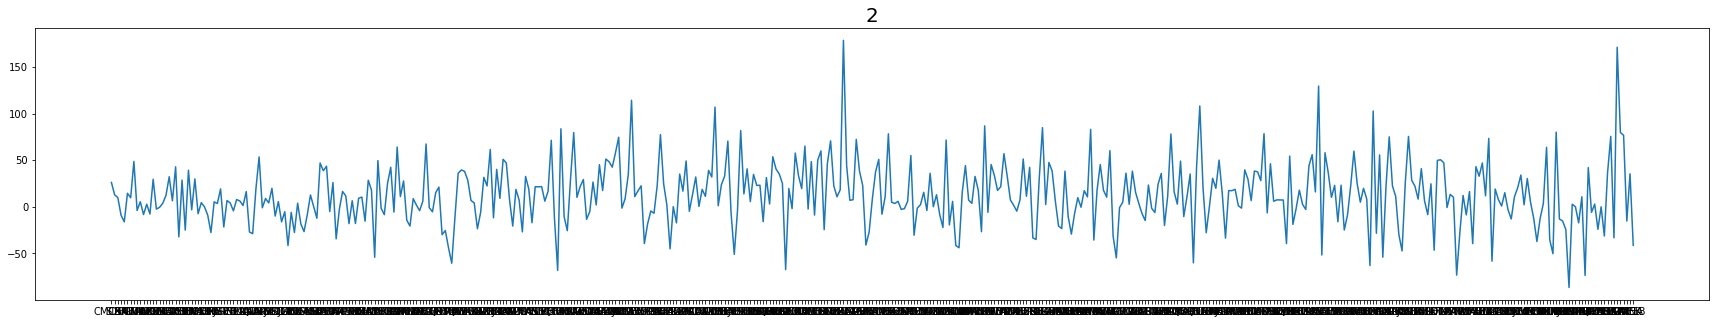

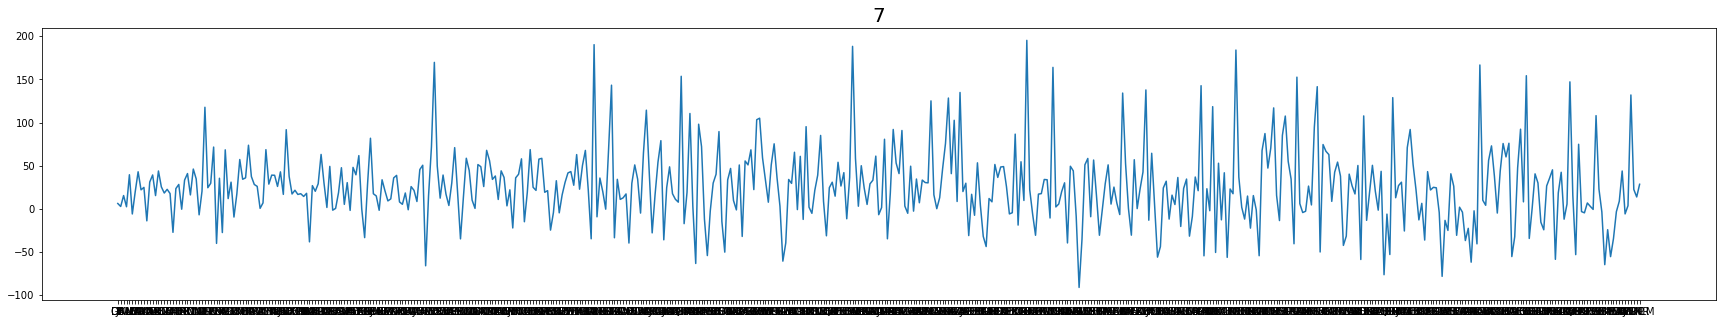

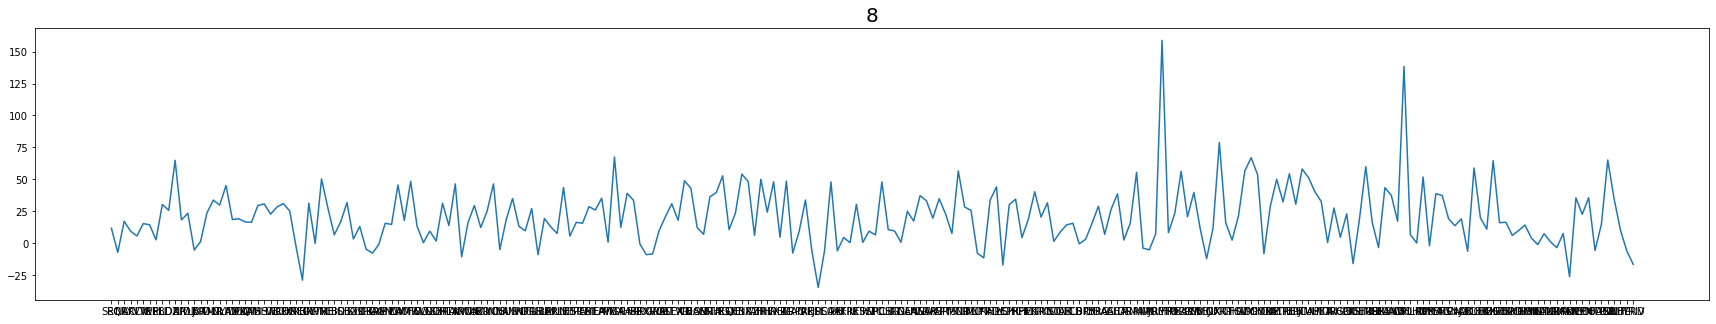

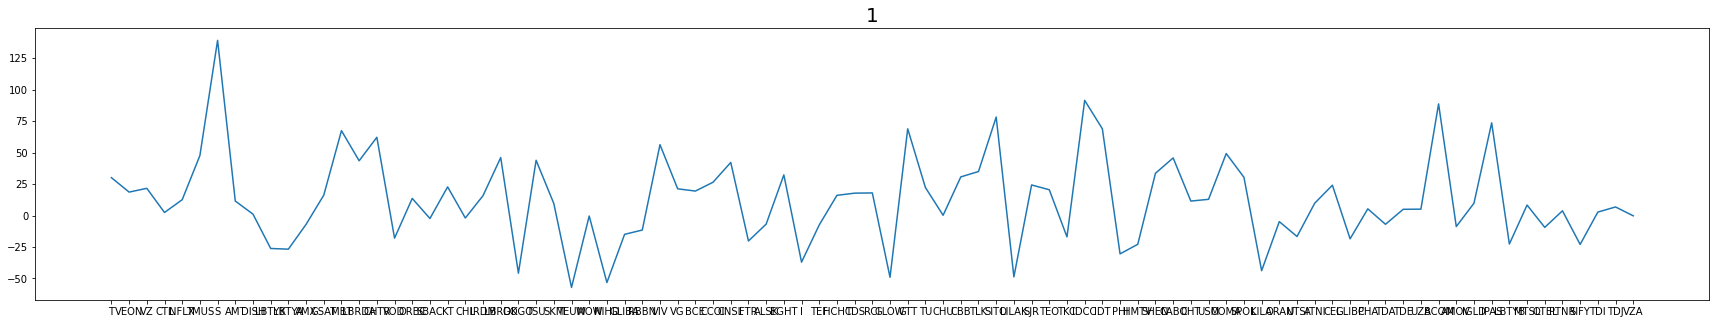

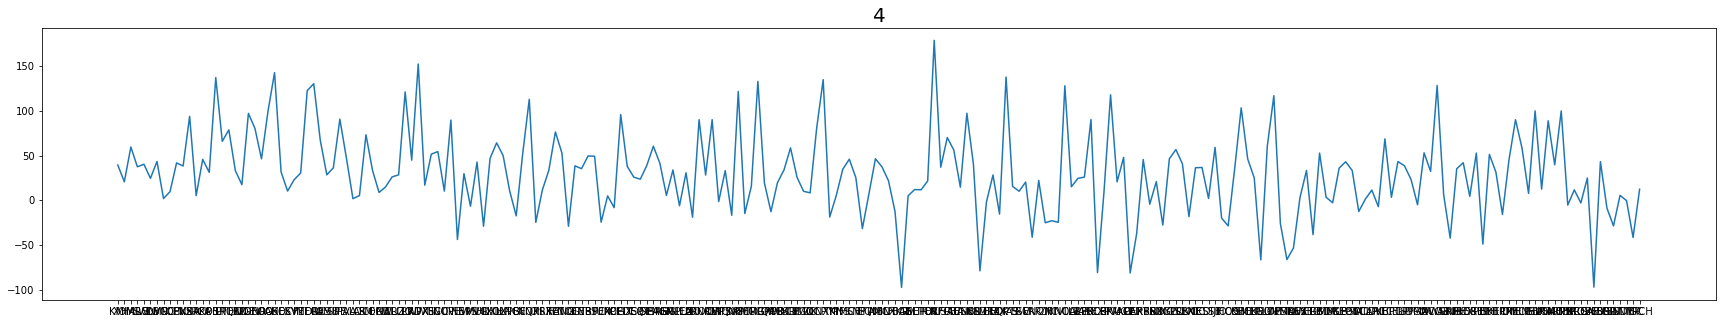

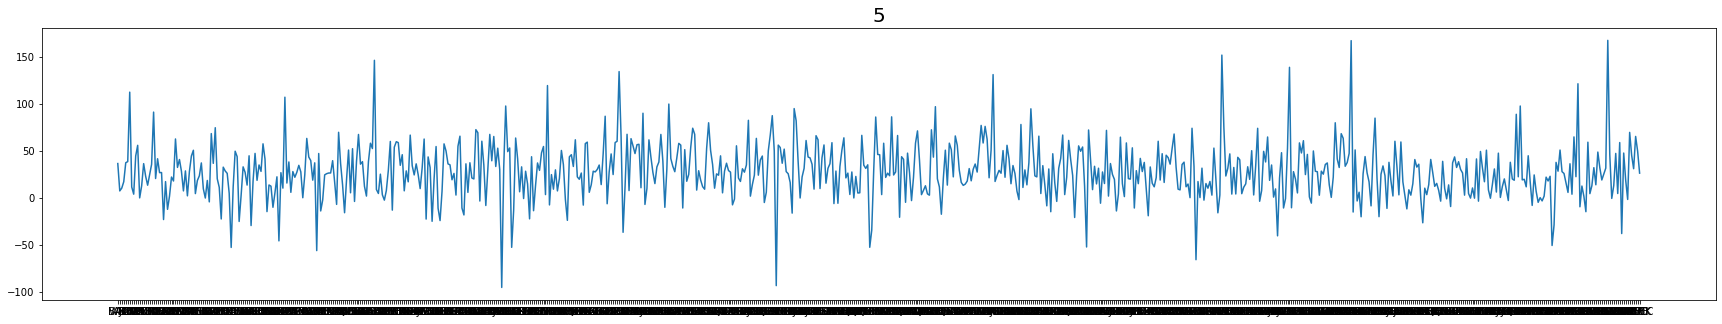

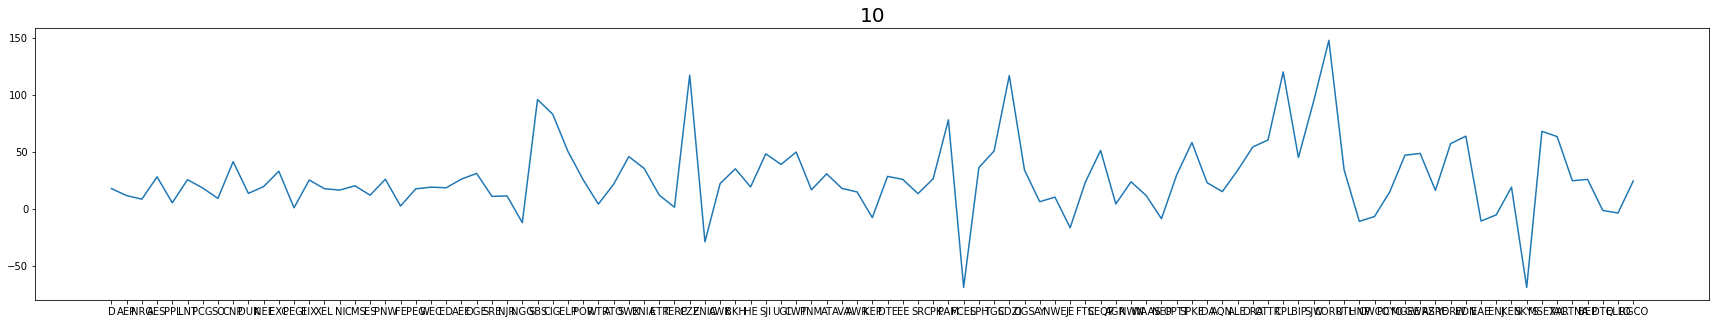

In [ ]:
#visualization of outliers (saw that in the description)

for data in all_data:
    
    data_outliers=data.loc[:,["Sector", "PRICE_VAR"]]

    sector_list=data_outliers["Sector"].unique()

    
    for sector in sector_list:
    
        temp=data_outliers[data_outliers["Sector"] == sector]
    
        plt.figure(figsize=(30,5))
        plt.plot(temp["PRICE_VAR"])
        plt.title(sector,fontsize=20)
        plt.show()

In [812]:
#creating train and test data in spirit of time series analysis

df_train=pd.concat([df14,df15,df16,df17])
df_test=df18

df_train.shape

df_train.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'PRICE_VAR', 'Class', 'GDP', 'Inflation', 'year', 'strategy'],
      dtype='object', length=208)

In [788]:
#imputer; impute for train and test seperately
def imputer(data):
    
    imputer=IterativeImputer(max_iter=1,random_state=0)
    imputer.fit(data)
    imp_transform=imputer.transform(data)
    df_filled=pd.DataFrame(imp_transform,columns=df_train.columns,index=data.index)

    return df_filled

df_train_imputed=imputer(df_train)
df_test_imputed=imputer(df_test)

C:\Users\eminu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\eminu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [780]:
#making csv files for the preprocessed dataset

df_train_imputed.to_csv("Clean Training Set.csv")
df_test_imputed.to_csv("Clean Test Set.csv")

In [772]:
#checking if it worked

df_train_imputed.isnull().sum()
df_test_imputed.isnull().sum()

#df_train_imputed.isin([0]).sum()

Revenue             741
Revenue Growth      789
Cost of Revenue    3455
Gross Profit        742
R&D Expenses       9938
                   ... 
Class              8572
GDP                   0
Inflation             0
year                  0
strategy           6564
Length: 208, dtype: int64

In [790]:
df_train_imputed

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR,Class,GDP,Inflation,year,strategy
PG,7.440100e+10,-0.071300,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,0.122800,0.000000,-0.174600,3.0,-9.323276,0.0,1.783845e+13,1.6222,2014.0,2.0
VIPS,3.734148e+09,1.173700,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,2.791636,1.648400,1.731300,3.0,-25.512193,0.0,1.783845e+13,1.6222,2014.0,2.0
KR,9.837500e+10,0.018200,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.273800,0.000000,0.023400,3.0,33.118297,1.0,1.783845e+13,1.6222,2014.0,0.0
RAD,2.552641e+10,0.005300,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,-0.045800,0.000000,-0.006000,3.0,2.752291,1.0,1.783845e+13,1.6222,2014.0,2.0
GIS,1.790960e+10,0.007600,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.102500,0.000000,-0.022000,3.0,12.897715,1.0,1.783845e+13,1.6222,2014.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI,6.257258e+07,0.025800,5.232652e+07,1.024606e+07,0.000000e+00,9.683601e+06,9.683601e+06,5.624630e+05,0.000000e+00,5.311890e+05,...,0.000000,0.000000,0.061700,9.0,-12.264152,0.0,1.983183e+13,2.1301,2017.0,2.0
TZOO,1.065240e+08,-0.067700,1.290900e+07,9.361500e+07,9.224000e+06,7.984600e+07,8.907000e+07,4.545000e+06,0.000000e+00,6.656000e+06,...,0.000000,0.014100,-0.015800,9.0,46.716421,1.0,1.983183e+13,2.1301,2017.0,0.0
USATP,1.040000e+08,4.031261,7.700000e+07,2.700000e+07,2.460694e+08,2.500000e+07,2.700000e+07,0.000000e+00,1.000000e+06,-2.000000e+06,...,0.228934,4.073583,0.791254,9.0,-32.220041,0.0,1.983183e+13,2.1301,2017.0,2.0
WSTG,1.605670e+08,-0.024600,1.334910e+08,2.707600e+07,0.000000e+00,1.926300e+07,1.926300e+07,7.813000e+06,-6.990000e+05,8.553000e+06,...,0.000000,0.000000,0.029300,9.0,-36.405277,0.0,1.983183e+13,2.1301,2017.0,2.0


In [816]:
#variables for the algos and standardisation

scaler=StandardScaler().fit(X_train)

X_train=scaler.transform(df_train_imputed.drop(columns=["strategy"]))
Y_train=df_train_imputed["strategy"]

X_test=scaler.transform(df_test_imputed.drop(columns=["strategy"]))
Y_test=df_test_imputed["strategy"]

the other imputer is good now; do not use this one

imputer = KNNImputer(n_neighbors=10, weights='distance', metric='nan_euclidean', copy=True)

df14 = pd.DataFrame(imputer.fit_transform(df14),columns = df14.columns)

df15 = pd.DataFrame(imputer.fit_transform(df15),columns = df15.columns)

df16 = pd.DataFrame(imputer.fit_transform(df16),columns = df16.columns)

df17 = pd.DataFrame(imputer.fit_transform(df17),columns = df17.columns)

df18 = pd.DataFrame(imputer.fit_transform(df18),columns = df18.columns)

#checking if it worked
df18.isnull().sum() 
df18.isin([0]).sum()

In [100]:
#evaluation function for the algos (from towards data science; might be useful later)

def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

In [ ]:
#pipelining all of the above to prevent leakage from test data into training data which might be useful later (from tds)
def cross_validate(classifier, cv):
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ])
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        pipeline.fit(X_t, y_t)
        y_hat_t = pipeline.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = pipeline.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')
    

main determinants of stock prices
(i) perceived risk --> risk measure
(ii) price forecast --> maybe a time series forecast
(iii) underlying variables (our dataset) --> we have got plenty of that
(iv) inflation --> we have got that


[]

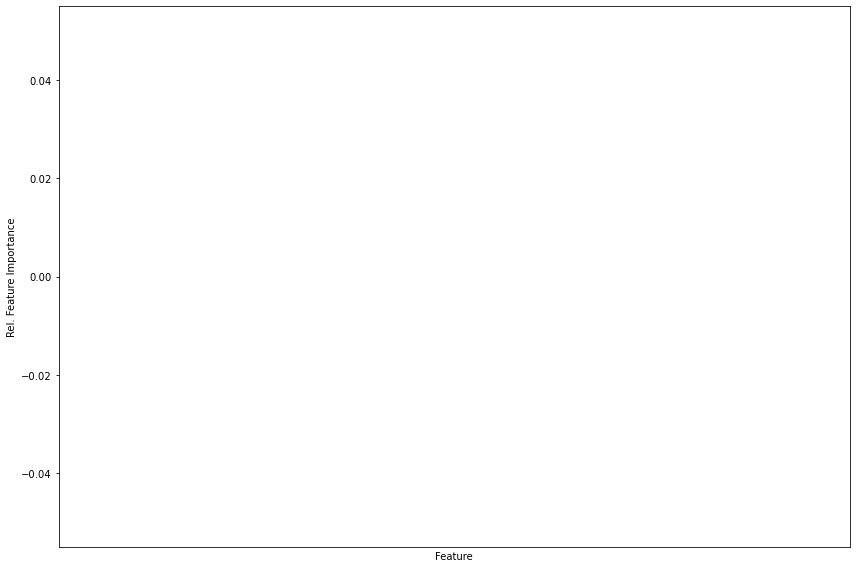

In [814]:
#feature selection
#does not work yet as we have NA values --> important that we finish the imputer stuff

def select_features(X,Y,threshold):
    
    #X are the features with whom we want to classify Y [Strategy] and threshold being a threshold [percentages]
    
    features=X.columns[:]
    
    forest=RandomForestClassifier(random_state=1,class_weight="balanced")
    forest.fit(X,Y)
    importances=forest.feature_importances_
    
    #Define n as number of importances over the value thres
    n = sum(importances > threshold)
    
    # Get cumsum of the n most important features
    feat_imp = np.sort(importances)[::-1]
    sum_feat_imp = np.cumsum(feat_imp)[:n]
    
    # Sort output (by relative importance) and 
    # print top n features
    indices = np.argsort(importances)[::-1]
    for i in range(n):
        print('{0:2d}) {1:7s} {2:6.4f}'.format(i + 1, 
                                           features[indices[i]],
                                           importances[indices[i]]))
        
    
    # Plot Feature Importance (both cumul., individual)
    plt.figure(figsize=(12, 8))
    plt.bar(range(n), importances[indices[:n]], align='center')
    plt.xticks(range(n), features[indices[:n]], rotation=90)
    plt.xlim([-1, n])
    plt.xlabel('Feature')
    plt.ylabel('Rel. Feature Importance')
    plt.step(range(n), sum_feat_imp, where='mid', 
         label='Cumulative importance')
    plt.tight_layout();
    
    
    # Create a list with the important features for ML algorhithms
    feature_list = [None] * n
    for i in range(n):
        feature_list[i] = features[indices[i]]
    
    # return the list of important features
    return feature_list


select_features(X_train,Y_train,10)

In [779]:
#feature selection


sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

#which ones were selected?
sel.get_support()

#list of selected variables
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

Index(['PRICE_VAR', 'Class', 'GDP', 'Inflation', 'year'], dtype='object')


Neural Networks

In [775]:
#function for the neural net

def neural(X_train, Y_train, hidden_layer, maxIter):
    """ 
    This function applies MLP Classifier on X_train and Y_train and uses grid-cross validation on the datasets.
    :param X_train: Training Set of X values
    :param Y_train: Training Set of Y values(factorized)
    :param hidden_layer: array of values which will be tested for variable hidden_layer_sizes
    :param maxIter: array of values which will be tested for variable max_iter
        
    """

    mlp = MLPClassifier(random_state=0, solver= "lbfgs", warm_start= True)
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('neural', MLPClassifier())])
    
    # Define the hyperparameter values to be tested
    param_grid = {"neural__hidden_layer_sizes" : hidden_layer,
                  'neural__max_iter': maxIter},


    # Run brute-force grid search
    #solver "lbfgs" has proven to be the best
    grid = GridSearchCV(pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv= 5, n_jobs=-1)
    grid = grid.fit(X_train, Y_train)
    return(grid)

In [813]:
#neural networks (MLP)



#Define arrays of values to be tested for paramgrid inside GridSearchCV function

#The ith element represents the number of neurons in the ith hidden layer.
hidden_lay = np.array([400])

# Max number of iterations
max_Iter = np.array([575])
#Run MLP Classifier

import datetime

print(datetime.datetime.now())

mlp = neural(X_train,Y_train, hidden_lay, max_Iter)
print('Best CV accuracy: {:.4f}'.format(mlp.best_score_))
print('Test score:       {:.4f}'.format(mlp.score(X_test,Y_test)))
print('Best parameters: {}'.format(mlp.best_params_))
print(datetime.datetime.now())

# Predict classes
y_pred6 = mlp.predict(X_test)

# Manual confusion matrix as pandas DataFrame
confm = pd.DataFrame({'Predicted': y_pred6,
                      'True': Y_test})
print(confm.groupby(['True','Predicted'], sort=True).size().unstack('Predicted'))


2021-04-08 13:23:41.840952


C:\Users\eminu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best CV accuracy: 0.6991
Test score:       0.2687
Best parameters: {'neural__hidden_layer_sizes': 400, 'neural__max_iter': 575}
2021-04-08 13:30:12.430877
Predicted    0.0  1.0     2.0
True                         
0.0        114.0  7.0  3053.0
1.0          1.0  NaN   147.0
2.0          4.0  NaN  1066.0


Deep Neural Networks

In [825]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(8, activation='relu', input_shape=(14,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, Y_train,epochs=8, batch_size=1, verbose=1)

ModuleNotFoundError: No module named 'tensorflow'